In [1]:
library(circular)


Attaching package: ‘circular’

The following objects are masked from ‘package:stats’:

    ecdf, sd, var



In [2]:
library(microbenchmark)

In [3]:
library("movMF")

## Pvonmises Result

In [7]:
pvonmises(c(2,0.8),circular(2),6)

[1] 0.500000000 0.003595458

This function can handle multiple inputs. As seen above, with vector of two points, mu= 2 (converted to radians) and kappa=6 as input, we get the cdf of the two points respectively. 

At data point = 2, the pdf is 0.5

At data point =0.8, the pdf is 0.003595

## Qvonmises Result


In [10]:
qvonmises(0.5,circular(1),6)

Circular Data: 
Type = angles 
Units = radians 
Template = none 
Modulo = asis 
Zero = 0 
Rotation = counter 
[1] 1

This function calculates the quantile from von mises distribution. With the probabilty as 0.5, mu=1 (converted to radians) and kappa=6, the corresponding quantile is 1.00000000000064

## Dvonmises Result

In [12]:
dvonmises(1,circular(1),6)

[1] 0.9549826

This function calculates the pdf of a given data point. At x=1, mu=1(converted to radians) and kappa=6, the pdf is 0.954982568559449. 

## Circular plot of Random Deviates generated from rvonmises

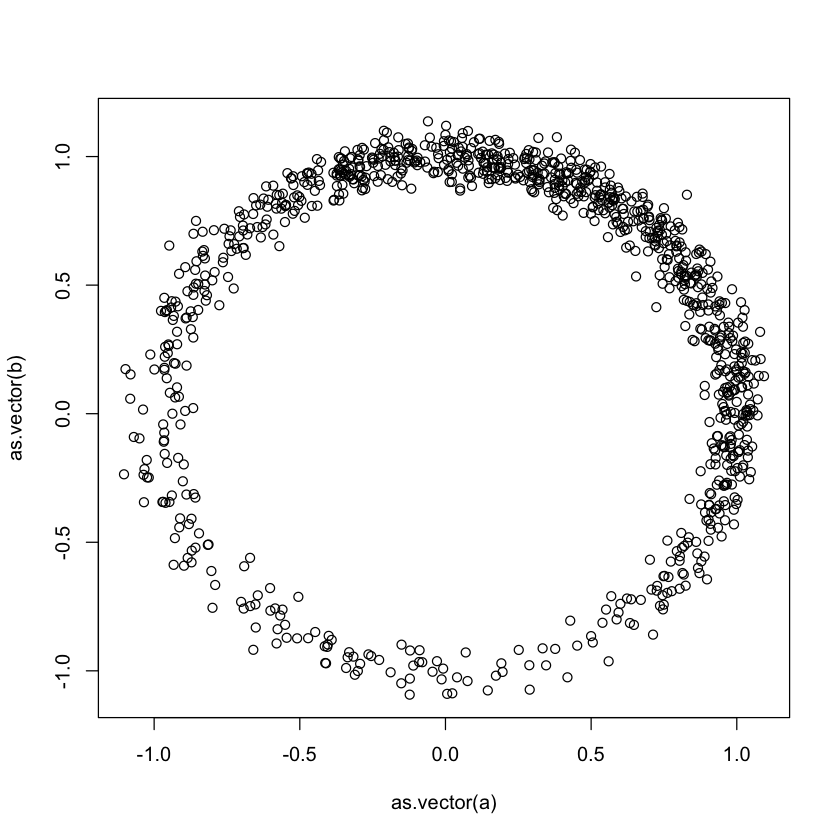

In [13]:
x=rvonmises(1000,circular(1),kappa=1)
n=1000
a=cos(x)+rnorm(1000,0,0.05)
b=sin(x)+rnorm(1000,0,0.05)
plot(as.vector(a),as.vector(b))

We first generate 1000 random deviates using the rvonmises function with mean as 1 radian. To represent them on a circle we need to convert each point into a vector. So, we calculate the cosine and sine of the random deviate and we then plot them by taking the cosine as the x coordinate and sine as the y coordinate. 

## Benchamarking the functions of vonMises package

In [11]:
options(warn=-1)
out<-microbenchmark(rvonmises(1000,circular(1),1),pvonmises(c(2,0.8),circular(2),6),qvonmises(0.5,circular(1),6),dvonmises(1,circular(1),6))
summary(out)

expr,min,lq,mean,median,uq,max,neval
"rvonmises(1000, circular(1), 1)",221.412,233.7125,245.1674,239.4195,244.8770,334.799,100
"pvonmises(c(2, 0.8), circular(2), 6)",389.073,404.6175,456.8527,419.6150,433.2440,2387.534,100
"qvonmises(0.5, circular(1), 6)",363.839,388.3920,421.6685,402.3140,417.7495,596.765,100
"dvonmises(1, circular(1), 6)",272.316,285.1505,326.9828,293.8370,306.7850,2378.477,100


For Rvonmises to generate 1000 random deviates, it takes 245.1674 nano seconds. 

For pvonmises with input of 2 data points (2,0.8) and mu=2(converted to radians) and kappa =6, it takes 419.6150 nano seconds

For qvonmises with input as 0.5 (converted to radians) and mu = 1 (converted to radians) and kappa=6 it takes 402.3140 nano seconds. 

For dvonmises with input as 1, mu=1(converted to radians) and kappa=6 it takes 293.8370 nano seconds. 

In [6]:
library("movMF")

In [14]:
x= rnorm(500,100,20) 
y= rnorm(500,50,10)

x1=rnorm(1000,50,10) 
y1=rnorm(1000,0,10)

x2=rnorm(750,50,10)  
y2=rnorm(750,100,20)

In [15]:
c1=cbind(x,y)
c2=cbind(x1,y1)
c3=cbind(x2,y2)

In [16]:
c4=rbind(c1,c2) # case 1 - cluster 2

c4=rbind(c1,c2,c3) #case 1 - cluster 3

## Benchmarking movMF

In [18]:
stime<-Sys.time()
movMF(c4, 3, nruns = 500)
etime<-Sys.time()
etime-stime

theta:
         x           y
1 39.76431 77.54942157
2 52.49045 26.26301762
3 23.88031  0.02787423
alpha:
[1] 0.3292341 0.2286504 0.4421155
L:
[1] 3138.474

Time difference of 35.27261 secs

Here, we store the initial system time value in stime. We then call movMF function for 500 runs and then store the end time in etime. The function time is then calculated by the difference between end time and start time. 

For 500 runs, 3 clusters, the time taken by movMF package is 35.27261 sec